## Librerias 


In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

## Base de datos

In [3]:
 #Ruta del archivo
data = r"C:\Users\Maria\OneDrive\Escritorio\Proyecto No Country\2019-Nov.csv"

# Leer el archivo CSV
ecommerce = pd.read_csv(data)

## Análisis exploratorio 

In [4]:
ecommerce.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67501979 entries, 0 to 67501978
Data columns (total 9 columns):
 #   Column         Dtype  
---  ------         -----  
 0   event_time     object 
 1   event_type     object 
 2   product_id     int64  
 3   category_id    int64  
 4   category_code  object 
 5   brand          object 
 6   price          float64
 7   user_id        int64  
 8   user_session   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 4.5+ GB


In [5]:
# Cambio de datos

ecommerce["event_time"] = pd.to_datetime(ecommerce["event_time"])


In [6]:
ecommerce.shape

(67501979, 9)

# Duplicados

In [7]:
ecommerce.duplicated().sum()

100519

## Valores Nulos

In [8]:
ecommerce.isnull().sum()

event_time              0
event_type              0
product_id              0
category_id             0
category_code    21898171
brand             9224078
price                   0
user_id                 0
user_session           10
dtype: int64

In [9]:
# Eliminacion de valores nulos
ecommerce= ecommerce.dropna()

In [10]:
# Creacion de columnas de año,mes y hora

ecommerce["year"]= ecommerce["event_time"].dt.year
ecommerce["month"]= ecommerce["event_time"].dt.month
ecommerce["week"] = ecommerce["event_time"].dt.hour

## Análisis y gráficos

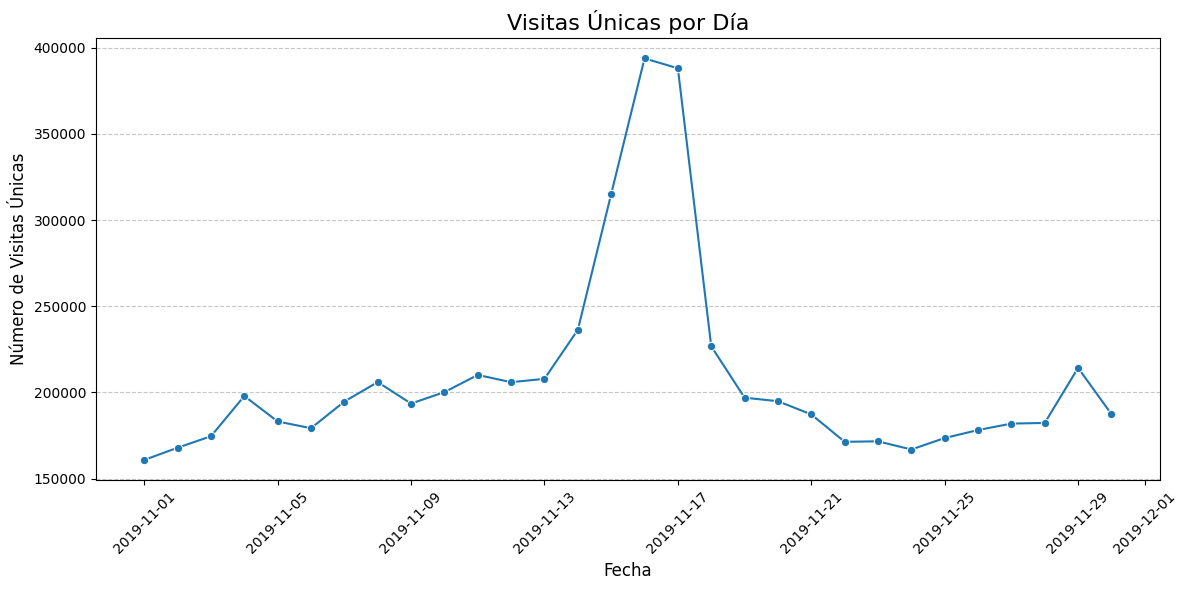

In [11]:
visitas_dia = ecommerce.groupby(ecommerce["event_time"].dt.date)["user_id"].nunique()


# Crear DataFrame a partir de visitas_dia
visitas_dia_df = visitas_dia.reset_index()
visitas_dia_df.columns = ["Fecha", "Visitas Únicas"]

# Configurar el gráfico
plt.figure(figsize=(12, 6))
sns.lineplot(data=visitas_dia_df, x="Fecha", y="Visitas Únicas", marker="o")

# Personalizar el gráfico
plt.title("Visitas Únicas por Día", fontsize=16)
plt.xlabel("Fecha", fontsize=12)
plt.ylabel("Número de Visitas Únicas", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Mostrar el gráfico
plt.show()


In [19]:
# Contar la cantidad de cada tipo de evento
event_counts = ecommerce["event_type"].value_counts()

# Crear un DataFrame con el flujo de eventos
funnel_data = pd.DataFrame({
    "Evento": event_counts.index,
    "Cantidad": event_counts.values
})


# Gráfico de embudo
fig = px.funnel(funnel_data, x="Cantidad", y="Evento", title="Flujo de Eventos (Embudo)")
fig.show()

C:\Users\Maria\AppData\Local\Temp\ipykernel_10128\2586123023.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




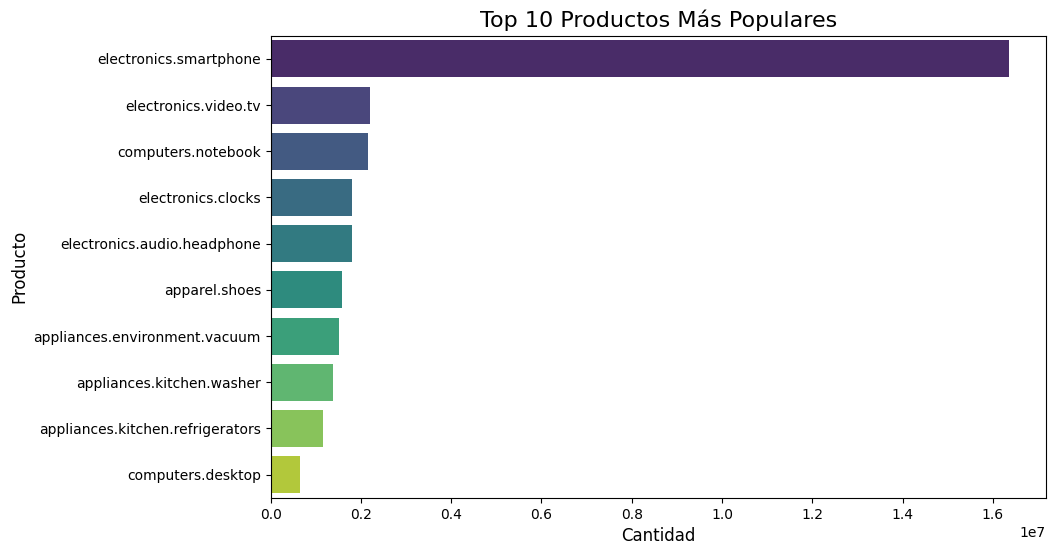

In [26]:
# Contar los productos más populares
top_products = ecommerce["category_code"].value_counts().head(10)

# Gráfico de barras para los productos más populares
plt.figure(figsize=(10, 6))
sns.barplot(x=top_products.values, y=top_products.index, palette="viridis")
plt.title("Top 10 Productos Más Populares", fontsize=16)
plt.xlabel("Cantidad", fontsize=12)
plt.ylabel("Producto", fontsize=12)
plt.show()

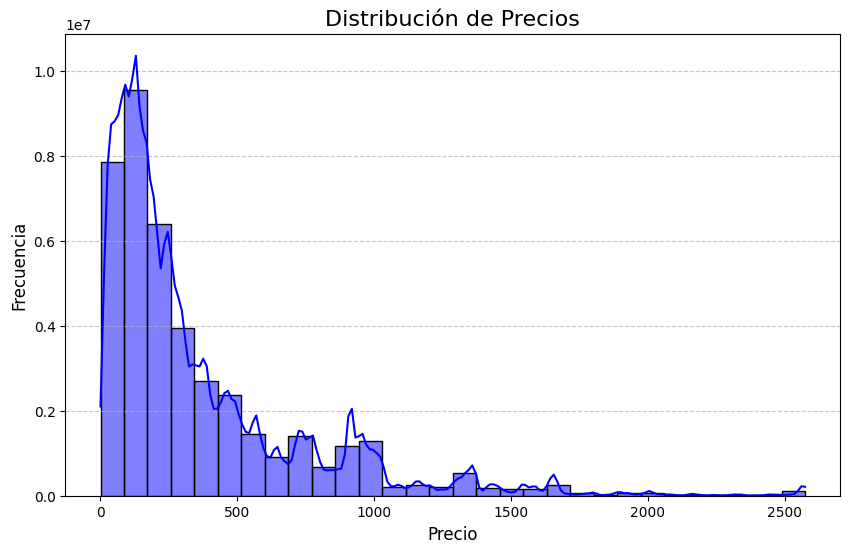

In [14]:
# Gráfico de distribución de precios
plt.figure(figsize=(10, 6))
sns.histplot(ecommerce["price"], kde=True, bins=30, color="blue")
plt.title("Distribución de Precios", fontsize=16)
plt.xlabel("Precio", fontsize=12)
plt.ylabel("Frecuencia", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


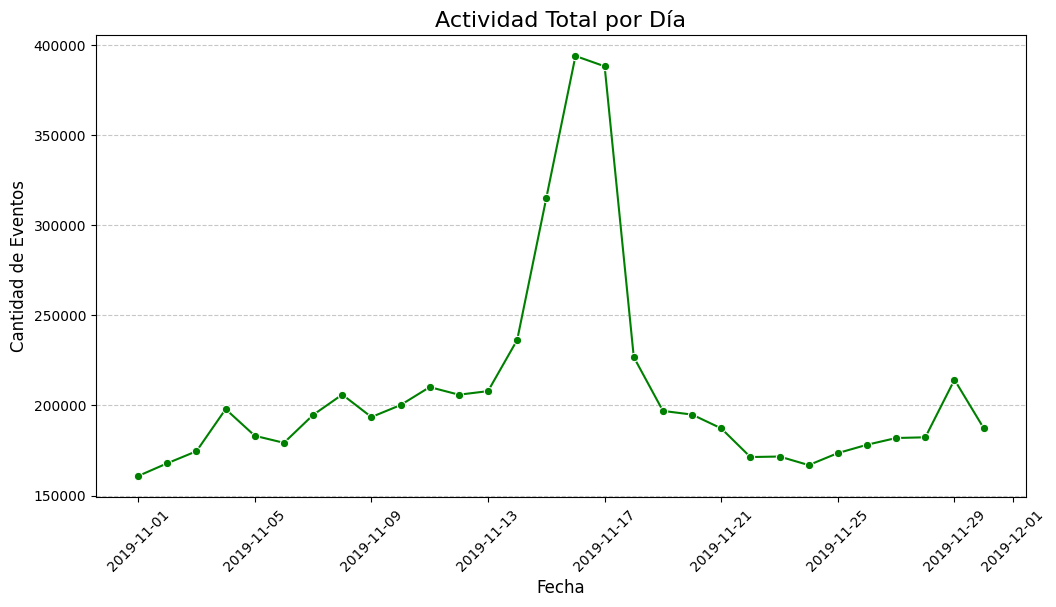

In [20]:

# Agrupar por día y contar eventos
actividad_por_dia = ecommerce.groupby(ecommerce["event_time"].dt.date)["event_type"].count()

# Gráfico de líneas para la actividad diaria
plt.figure(figsize=(12, 6))
sns.lineplot(x= visitas_dia.index, y=visitas_dia.values, marker="o", color="green")
plt.title("Actividad Total por Día", fontsize=16)
plt.xlabel("Fecha", fontsize=12)
plt.ylabel("Cantidad de Eventos", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


C:\Users\Maria\AppData\Local\Temp\ipykernel_10128\107475473.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




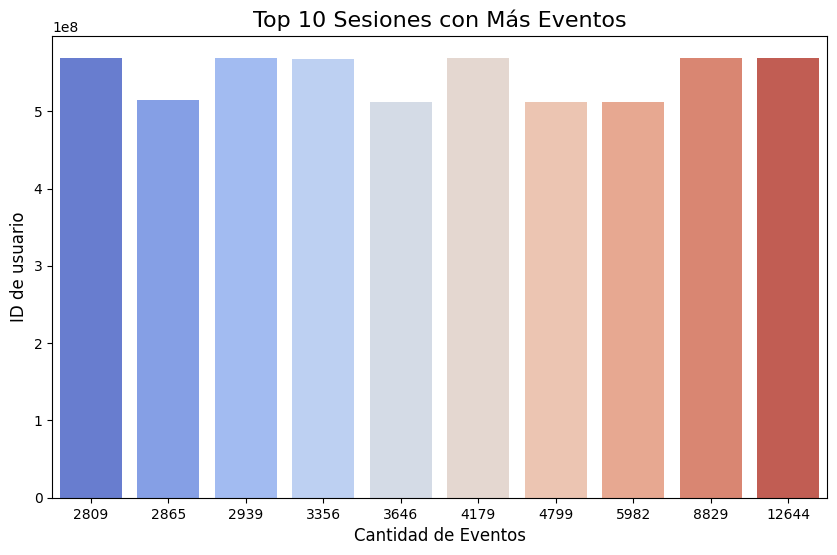

In [25]:
# Contar eventos por sesión
eventos_por_sesion = ecommerce["user_id"].value_counts()

# Gráfico de barras para las sesiones con más eventos (top 10)
plt.figure(figsize=(10, 6))
sns.barplot(x=eventos_por_sesion.head(10).values, y=eventos_por_sesion.head(10).index, palette="coolwarm")
plt.title("Top 10 Sesiones con Más Eventos", fontsize=16)
plt.xlabel("Cantidad de Eventos", fontsize=12)
plt.ylabel("ID de usuario", fontsize=12)
plt.show()

C:\Users\Maria\AppData\Local\Temp\ipykernel_10128\170561688.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




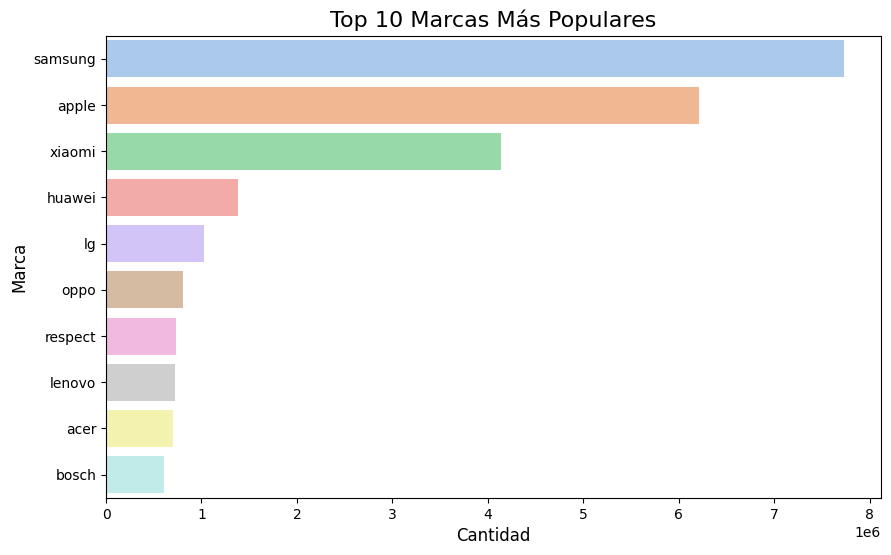

In [22]:
# Contar las marcas más populares
top_brands = ecommerce["brand"].value_counts().head(10)

# Gráfico de barras para las marcas más populares
plt.figure(figsize=(10, 6))
sns.barplot(x=top_brands.values, y=top_brands.index, palette="pastel")
plt.title("Top 10 Marcas Más Populares", fontsize=16)
plt.xlabel("Cantidad", fontsize=12)
plt.ylabel("Marca", fontsize=12)
plt.show()